In [11]:
from MakeSyntheticSeismic import * 
import numpy as np 
import matplotlib.pyplot as plt
from math import log10

In [6]:
cs, n, ns = MakeSeismic(samples=10,img_size=256)

In [18]:
def PSNR(clean, noisy): 
    mse = np.mean((clean - noisy) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = np.max(clean)
    psnr = 20 * log10(max_pixel / np.sqrt(mse)) 
    return psnr

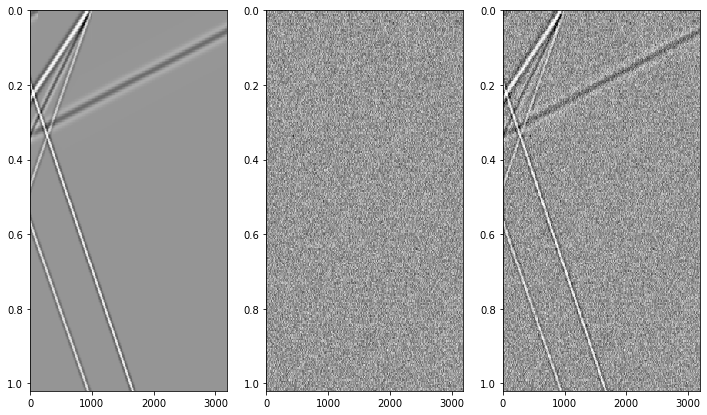

In [24]:
PlotSeis([cs,n,ns],num=4)

In [25]:
PSNR(cs[4],ns[4])

15.940082017533062

In [6]:
def img2windows(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    assert h % nrows == 0, "{} rows is not evenly divisble by {}".format(h, nrows)
    assert w % ncols == 0, "{} cols is not evenly divisble by {}".format(w, ncols)
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

In [15]:
blocks = blockshaped(cs[0],16,16)
blocks.shape

(256, 16, 16)

In [9]:
def windows2img(arr, h, w):
    """
    Return an array of shape (h, w) where
    h * w = arr.size

    If arr is of shape (n, nrows, ncols), n sublocks of shape (nrows, ncols),
    then the returned array preserves the "physical" layout of the sublocks.
    """
    n, nrows, ncols = arr.shape
    return (arr.reshape(h//nrows, -1, nrows, ncols)
               .swapaxes(1,2)
               .reshape(h, w))

In [13]:
regen_block = unblockshaped(blocks,256,256)

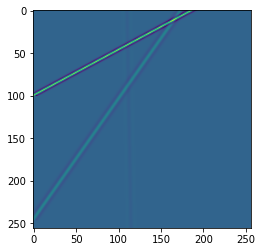

In [14]:
plt.imshow(regen_block)

In [4]:
import numpy as np
import random


In [18]:
n = np.random.normal(loc=0,scale=0.25,size=(128,128))*random.uniform(-0.5,0.5)

In [19]:
np.min(n)

-0.3312985448422469

In [20]:
np.max(n)

0.32836130137718667